In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data import *
from features import *
from stats import *
from preprocess import *
from model import *
from step import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
import sklearn.linear_model

In [11]:
step = Step(load_mnm_spatial)
step = Step(gt_n_trials, step, n=8)
step = Step(subset, step, key='cell', value='NIN-PFC-AD-PRE-145')

In [12]:
all_df = step()['raw_df']
all_df = all_df.reset_index()
all_df['best_pos'] = 4

In [13]:
all_df

,cell,position,trial,ts,ismatch,best_pos
0,NIN-PFC-AD-PRE-145,0,0,"[0.172675, 0.1929, 0.198175, 0.2216, 0.231675,...",0,4
1,NIN-PFC-AD-PRE-145,0,1,"[0.104425, 0.120675, 0.123725, 0.1317, 0.18582...",0,4
2,NIN-PFC-AD-PRE-145,0,2,"[0.120475, 0.428275, 0.433275, 0.590025, 0.592...",1,4
3,NIN-PFC-AD-PRE-145,0,3,"[0.138875, 0.140375, 0.257975, 0.403525, 0.581...",1,4
4,NIN-PFC-AD-PRE-145,0,4,"[0.068775, 0.266675, 0.35055, 0.569225, 0.7270...",0,4
...,...,...,...,...,...,...
242,NIN-PFC-AD-PRE-145,7,25,"[0.0841, 0.19835, 0.3678, 0.430875, 0.52215, 0...",1,4
243,NIN-PFC-AD-PRE-145,7,26,"[0.091325, 0.227075, 0.276475, 0.317, 0.3431, ...",1,4
244,NIN-PFC-AD-PRE-145,7,27,"[0.092, 0.175125, 0.24195, 0.280175, 0.312875,...",1,4
245,NIN-PFC-AD-PRE-145,7,28,"[0.007775, 0.129175, 0.132325, 0.2513, 0.31065...",0,4


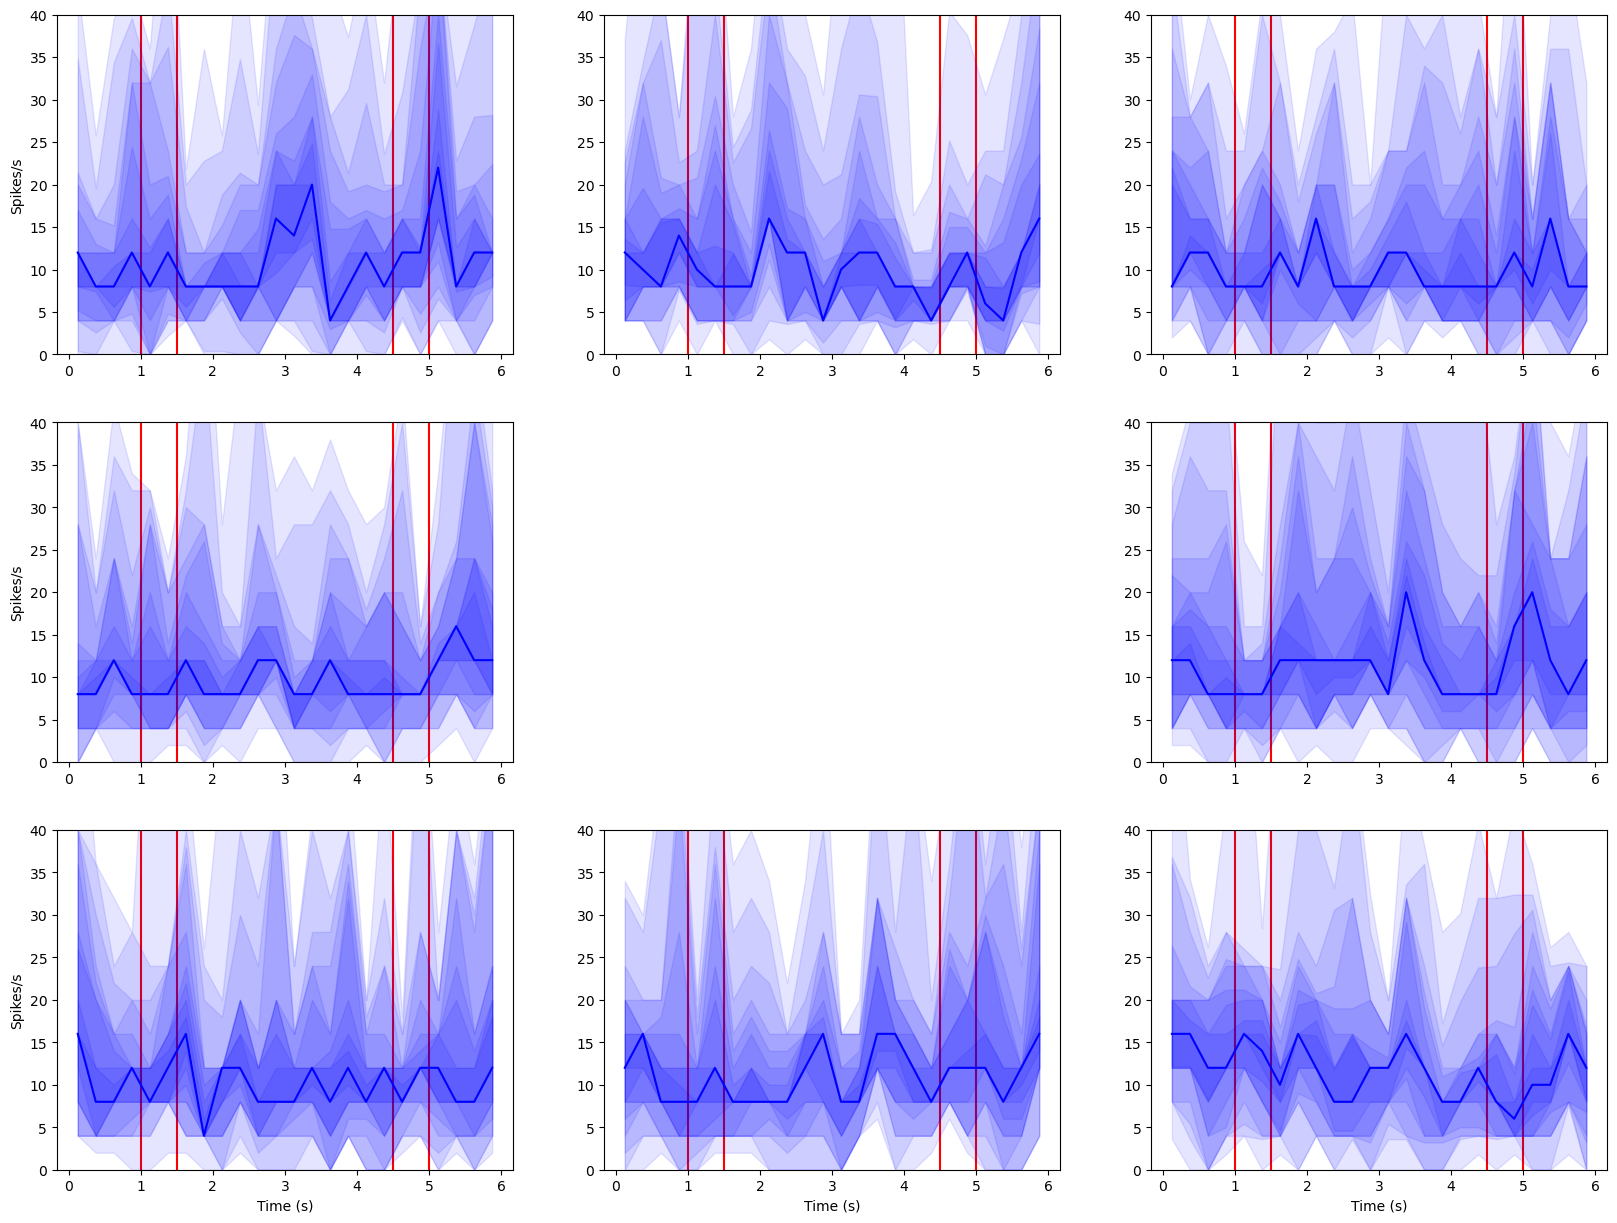

In [56]:
rows_and_cols = [(1, 2), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]

fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for i in range(8):
    r, c = rows_and_cols[i]

    # low_pos = (all_df.best_pos - i) % 8
    # high_pos = (all_df.best_pos + i) % 8
    # df = all_df[(all_df.position == low_pos) | (all_df.position == high_pos)]
    df = all_df[all_df.position == i]
    ts = np.concatenate(df.ts.array)
    ts.sort()
    BIN_WIDTH = 0.25
    bins=np.arange(0, 6 + BIN_WIDTH / 2, BIN_WIDTH)
    ts_array = np.stack([np.histogram(x, bins=bins)[0] for x in df.ts.array])
    x = bins[:-1] + BIN_WIDTH / 2
    # y = np.mean(ts_array, axis=0) / BIN_WIDTH
    # y = ts_array / 
    y = np.median(ts_array, axis=0) / BIN_WIDTH

    for q in range(5, 50, 5):
        qlow = np.percentile(ts_array, q, axis=0) / BIN_WIDTH
        qhigh = np.percentile(ts_array, 100 - q, axis=0) / BIN_WIDTH
        ax[r,c].fill_between(x, qlow, qhigh, color='blue', alpha=0.1)

    ax[r,c].plot(x, y.T, label=f'{i}', color='blue')
    [ax[r,c].axvline(x=x, color='red', zorder=0) for x in [1.0, 1.5, 4.5, 5.0]]
    ax[r,c].set_ylim(0, 40)
    # plt.plot(x, y, label=f'{i} away from preferred')

ax[1, 1].remove()
[ax[i, 0].set_ylabel('Spikes/s') for i in range(3)]
[ax[2, i].set_xlabel('Time (s)') for i in range(3)]
plt.show()
# [plt.axvline(x=x, color='#dddddd', zorder=0) for x in [1.0, 1.5, 3.0]]
# plt.ylim(10, 30)
# plt.ylabel('Firing rate (spikes/s)')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()